## Importing data & packages

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, classification_report, recall_score
from sklearn import metrics
from sklearn.model_selection import GridSearchCV

In [2]:
#Load the data
travel_train = pd.read_csv("Traveldata_train_(2).csv")
travel_test = pd.read_csv("Traveldata_test_(2).csv")
survey_train = pd.read_csv("Surveydata_train_(2).csv")
survey_test = pd.read_csv("Surveydata_test_(2).csv")

## Mark training & testing column

In [3]:
# Create x and y train
df_train = pd.concat([travel_train, survey_train], axis = 1)
df_train.drop(columns = 'ID', inplace=True)
df_train['Data_Source'] = "train"
df_train_y = df_train['Overall_Experience']
df_train_x = df_train.drop(columns = 'Overall_Experience')

In [4]:
# Create x test
df_test_x = pd.concat([travel_test, survey_test], axis = 1)
df_test_x.drop(columns = 'ID', inplace=True)
df_test_x['Data_Source'] = "test"

In [8]:
df_test_x.head()

,Gender,Customer_Type,Age,Type_Travel,Travel_Class,Travel_Distance,Departure_Delay_in_Mins,Arrival_Delay_in_Mins,Seat_Comfort,Seat_Class,...,Onboard_Entertainment,Online_Support,Ease_of_Online_Booking,Onboard_Service,Legroom,Baggage_Handling,CheckIn_Service,Cleanliness,Online_Boarding,Data_Source
0,Female,NaN,36.0,Business Travel,Business,532,0.0,0.0,Acceptable,Green Car,...,Excellent,Good,Excellent,Excellent,Excellent,Excellent,Good,Excellent,Poor,test
1,Female,Disloyal Customer,21.0,Business Travel,Business,1425,9.0,28.0,Extremely Poor,Ordinary,...,Poor,Acceptable,Acceptable,Excellent,Acceptable,Good,Acceptable,Excellent,Acceptable,test
2,Male,Loyal Customer,60.0,Business Travel,Business,2832,0.0,0.0,Excellent,Ordinary,...,Excellent,Excellent,Needs Improvement,Needs Improvement,Needs Improvement,Needs Improvement,Good,Needs Improvement,Excellent,test
3,Female,Loyal Customer,29.0,Personal Travel,Eco,1352,0.0,0.0,Acceptable,Green Car,...,Acceptable,Excellent,Poor,Acceptable,Needs Improvement,Excellent,Excellent,Excellent,Poor,test
4,Male,Disloyal Customer,18.0,Business Travel,Business,1610,17.0,0.0,Excellent,Ordinary,...,Excellent,Excellent,Excellent,NaN,Acceptable,Excellent,Excellent,Excellent,Excellent,test


In [9]:
pd.set_option('display.max_columns', None)
df_train_x.head()

,Gender,Customer_Type,Age,Type_Travel,Travel_Class,Travel_Distance,Departure_Delay_in_Mins,Arrival_Delay_in_Mins,Seat_Comfort,Seat_Class,Arrival_Time_Convenient,Catering,Platform_Location,Onboard_Wifi_Service,Onboard_Entertainment,Online_Support,Ease_of_Online_Booking,Onboard_Service,Legroom,Baggage_Handling,CheckIn_Service,Cleanliness,Online_Boarding,Data_Source
0,Female,Loyal Customer,52.0,NaN,Business,272,0.0,5.0,Needs Improvement,Green Car,Excellent,Excellent,Very Convenient,Good,Needs Improvement,Acceptable,Needs Improvement,Needs Improvement,Acceptable,Needs Improvement,Good,Needs Improvement,Poor,train
1,Male,Loyal Customer,48.0,Personal Travel,Eco,2200,9.0,0.0,Poor,Ordinary,Excellent,Poor,Needs Improvement,Good,Poor,Good,Good,Excellent,Needs Improvement,Poor,Needs Improvement,Good,Good,train
2,Female,Loyal Customer,43.0,Business Travel,Business,1061,77.0,119.0,Needs Improvement,Green Car,Needs Improvement,Needs Improvement,Needs Improvement,Needs Improvement,Good,Excellent,Excellent,Excellent,Excellent,Excellent,Good,Excellent,Excellent,train
3,Female,Loyal Customer,44.0,Business Travel,Business,780,13.0,18.0,Acceptable,Ordinary,Needs Improvement,NaN,Needs Improvement,Acceptable,Needs Improvement,Acceptable,Acceptable,Acceptable,Acceptable,Acceptable,Good,Acceptable,Acceptable,train
4,Female,Loyal Customer,50.0,Business Travel,Business,1981,0.0,0.0,Acceptable,Ordinary,Acceptable,Acceptable,Manageable,Needs Improvement,Good,Excellent,Good,Good,Good,Good,Good,Good,Good,train


In [10]:
# Check the possible values of Online_Boarding variable
list(set(list(df_train_x['Online_Boarding'])))

['Needs Improvement',
 'Acceptable',
 'Poor',
 'Good',
 nan,
 'Extremely Poor',
 'Excellent']

## Data pre-processing

In [11]:
# Concatinate training and testing X
concat_X = pd.concat([df_train_x, df_test_x], axis = 0)

In [ ]:
# Categorical variable transformation (Since most of the categorical variables are ordinal in nature)
# Create a dictionary that is ordinal
ex_dict = {
 'Extremely Poor': 0,
 'Poor': 1,
 'Needs Improvement' : 2,
 'Acceptable' : 3,
 'Good' : 4,
 'Excellent' : 5
}

In [ ]:
# Apply the dictionary to each of the ordinal variable
concat_X['Seat_Comfort'] = concat_X['Seat_Comfort'].apply(lambda x: ex_dict.get(x, float("nan")))
concat_X['Arrival_Time_Convenient'] = concat_X['Arrival_Time_Convenient'].apply(lambda x: ex_dict.get(x, float("nan")))
concat_X['Catering'] = concat_X['Catering'].apply(lambda x: ex_dict.get(x, float("nan")))
concat_X['Onboard_Wifi_Service'] = concat_X['Onboard_Wifi_Service'].apply(lambda x: ex_dict.get(x, float("nan")))
concat_X['Onboard_Entertainment'] = concat_X['Onboard_Entertainment'].apply(lambda x: ex_dict.get(x, float("nan")))
concat_X['Online_Support'] = concat_X['Online_Support'].apply(lambda x: ex_dict.get(x, float("nan")))
concat_X['Ease_of_Online_Booking'] = concat_X['Ease_of_Online_Booking'].apply(lambda x: ex_dict.get(x, float("nan")))
concat_X['Onboard_Service'] = concat_X['Onboard_Service'].apply(lambda x: ex_dict.get(x, float("nan")))
concat_X['Legroom'] = concat_X['Legroom'].apply(lambda x: ex_dict.get(x, float("nan")))
concat_X['Baggage_Handling'] = concat_X['Baggage_Handling'].apply(lambda x: ex_dict.get(x, float("nan")))
concat_X['CheckIn_Service'] = concat_X['CheckIn_Service'].apply(lambda x: ex_dict.get(x, float("nan")))
concat_X['Cleanliness'] = concat_X['Cleanliness'].apply(lambda x: ex_dict.get(x, float("nan")))
concat_X['Online_Boarding'] = concat_X['Online_Boarding'].apply(lambda x: ex_dict.get(x, float("nan")))

In [ ]:
# There is another version of the ordinal variable in this dataset, repeat previous steps
ex_dict_2 = {
 'Very Inconvenient': 0,
 'Inconvenient': 1,
 'Needs Improvement' : 2,
 'Manageable' : 3,
 'Convenient' : 4,
 'Very Convenient' : 5
}

In [ ]:
# Apply the second dictionary
concat_X['Platform_Location'] = concat_X['Platform_Location'].apply(lambda x: ex_dict_2.get(x, float("nan")))

In [13]:
# Create dummy variables for the non-ordinal categorical variables
concat_X_dummy = pd.get_dummies(concat_X, drop_first = True)

In [15]:
concat_X_dummy

,Age,Travel_Distance,Departure_Delay_in_Mins,Arrival_Delay_in_Mins,Gender_Male,Customer_Type_Loyal Customer,Type_Travel_Personal Travel,Travel_Class_Eco,Seat_Comfort_Excellent,Seat_Comfort_Extremely Poor,Seat_Comfort_Good,Seat_Comfort_Needs Improvement,Seat_Comfort_Poor,Seat_Class_Ordinary,Arrival_Time_Convenient_Excellent,Arrival_Time_Convenient_Extremely Poor,Arrival_Time_Convenient_Good,Arrival_Time_Convenient_Needs Improvement,Arrival_Time_Convenient_Poor,Catering_Excellent,Catering_Extremely Poor,Catering_Good,Catering_Needs Improvement,Catering_Poor,Platform_Location_Inconvenient,Platform_Location_Manageable,Platform_Location_Needs Improvement,Platform_Location_Very Convenient,Platform_Location_Very Inconvenient,Onboard_Wifi_Service_Excellent,Onboard_Wifi_Service_Extremely Poor,Onboard_Wifi_Service_Good,Onboard_Wifi_Service_Needs Improvement,Onboard_Wifi_Service_Poor,Onboard_Entertainment_Excellent,Onboard_Entertainment_Extremely Poor,Onboard_Entertainment_Good,Onboard_Entertainment_Needs Improvement,Onboard_Entertainment_Poor,Online_Support_Excellent,Online_Support_Extremely Poor,Online_Support_Good,Online_Support_Needs Improvement,Online_Support_Poor,Ease_of_Online_Booking_Excellent,Ease_of_Online_Booking_Extremely Poor,Ease_of_Online_Booking_Good,Ease_of_Online_Booking_Needs Improvement,Ease_of_Online_Booking_Poor,Onboard_Service_Excellent,Onboard_Service_Extremely Poor,Onboard_Service_Good,Onboard_Service_Needs Improvement,Onboard_Service_Poor,Legroom_Excellent,Legroom_Extremely Poor,Legroom_Good,Legroom_Needs Improvement,Legroom_Poor,Baggage_Handling_Excellent,Baggage_Handling_Good,Baggage_Handling_Needs Improvement,Baggage_Handling_Poor,CheckIn_Service_Excellent,CheckIn_Service_Extremely Poor,CheckIn_Service_Good,CheckIn_Service_Needs Improvement,CheckIn_Service_Poor,Cleanliness_Excellent,Cleanliness_Extremely Poor,Cleanliness_Good,Cleanliness_Needs Improvement,Cleanliness_Poor,Online_Boarding_Excellent,Online_Boarding_Extremely Poor,Online_Boarding_Good,Online_Boarding_Needs Improvement,Online_Boarding_Poor,Data_Source_train
0,52.0,272,0.0,5.0,0,1,0,0,0,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,1
1,48.0,2200,9.0,0.0,1,1,1,1,0,0,0,0,1,1,1,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,0,0,1,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,1,0,0,1
2,43.0,1061,77.0,119.0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,1
3,44.0,780,13.0,18.0,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1
4,50.0,1981,0.0,0.0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,1,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
35597,8.0,1334,0.0,0.0,1,1,1,1,0,0,0,1,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0
35598,53.0,1772,0.0,0.0,0,1,0,0,0,0,0,1,0,1,0,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0
35599,22.0,1180,0.0,0.0,1,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,1,1,0,0,0,0,0,0,0,1,0,0
35600,67.0,420,23.0,16.0,0,1,1,1,1,0,0,0,0,1,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0


In [16]:
# Split back into X_training & X_testing
x_train_dummy = concat_X_dummy[concat_X_dummy['Data_Source_train'] == 1]
x_test_dummy = concat_X_dummy[concat_X_dummy['Data_Source_train'] == 0]

In [ ]:
# Delete data_source variable
x_train_dummy.drop(columns = 'Data_Source_train', inplace = True)
x_test_dummy.drop(columns = 'Data_Source_train', inplace = True)

In [19]:
# Add the y_training column into the x_training table
x_train_dummy['Overall_Experience'] = df_train_y

/var/folders/k3/wwr8906j5hs54pzpz54gx23h0000gn/T/ipykernel_2077/1498520343.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  x_train_dummy['Overall_Experience'] = df_train_y


In [ ]:
# Impute missing value for training data (using KNN imputer)
from sklearn.impute import KNNImputer
imputer = KNNImputer(n_neighbors = 2)
df_imputed_train = imputer.fit_transform(x_train_dummy)
x_train_dummy.iloc[:] = df_imputed_train

In [ ]:
# Impute missing value for testing data (using KNN imputer)
from sklearn.impute import KNNImputer
imputer = KNNImputer(n_neighbors = 2)
df_imputed_test = imputer.fit_transform(x_test_dummy)
x_test_dummy.iloc[:] = df_imputed_test

In [22]:
# Verify no more missing data
(x_train_dummy.isnull().sum() / x_train_dunmmy.shape[0])*100

Age                                  0.0
Travel_Distance                      0.0
Departure_Delay_in_Mins              0.0
Arrival_Delay_in_Mins                0.0
Gender_Male                          0.0
                                    ... 
Online_Boarding_Extremely Poor       0.0
Online_Boarding_Good                 0.0
Online_Boarding_Needs Improvement    0.0
Online_Boarding_Poor                 0.0
Overall_Experience                   0.0
Length: 79, dtype: float64

In [23]:
# Import packages for scalers
from sklearn.preprocessing import MinMaxScaler
import statsmodels.api as sm

In [24]:
# Scaling the numeric data for training
scaler = MinMaxScaler()
train_scaled = scaler.fit_transform(x_train_dummy)
train_scaled = pd.DataFrame(train_scaled, index = x_train_dummy.index, columns = x_train_dummy.columns)

In [25]:
# Scaling the numeric data for testing
scaler = MinMaxScaler()
test_scaled = scaler.fit_transform(x_test_dummy)
test_scaled = pd.DataFrame(test_scaled, index = x_test_dummy.index, columns = x_test_dummy.columns)

In [26]:
# Split training dataset into training and validation sets
train_final, validation_final = train_test_split(train_scaled, test_size = 0.2, train_size = 0.8, random_state=42)

In [28]:
# Standarize the names so that the testing data is called test_final
test_final = test_scaled

## Exploratory Data Analysis

In [36]:
# Outlier Detection (outliers Q3 + 1.5IQR)
train_final['Departure_Delay_in_Mins'].describe()

count    75503.000000
mean         0.009235
std          0.024188
min          0.000000
25%          0.000000
50%          0.000000
75%          0.007538
max          1.000000
Name: Departure_Delay_in_Mins, dtype: float64

In [38]:
# Outlier Detection (outliers Q3 + 1.5IQR)
train_final['Age'].describe()

count    75503.000000
mean         0.415417
std          0.193983
min          0.000000
25%          0.256410
50%          0.423077
75%          0.564103
max          1.000000
Name: Age, dtype: float64

(0.0, 100.0)

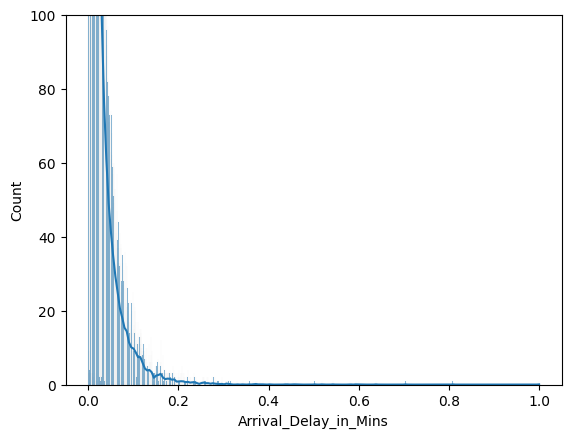

In [42]:
#EDA for numeric variable
fig, ax = plt.subplots()
sns.histplot(x = 'Arrival_Delay_in_Mins', data = train_final, kde = True, ax = ax);
#ax.set_xlim(5000,7000)
ax.set_ylim(0,100)

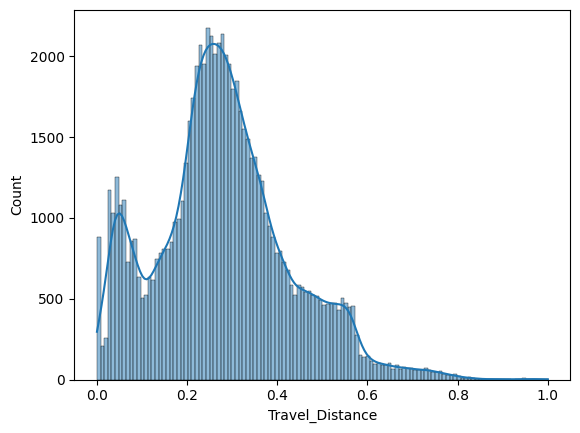

In [33]:
#EDA for numeric variable
fig, ax = plt.subplots()
sns.histplot(x = 'Travel_Distance', data = train_final, kde = True, ax = ax);
#ax.set_xlim(5000,7000)
#ax.set_ylim(0,100)

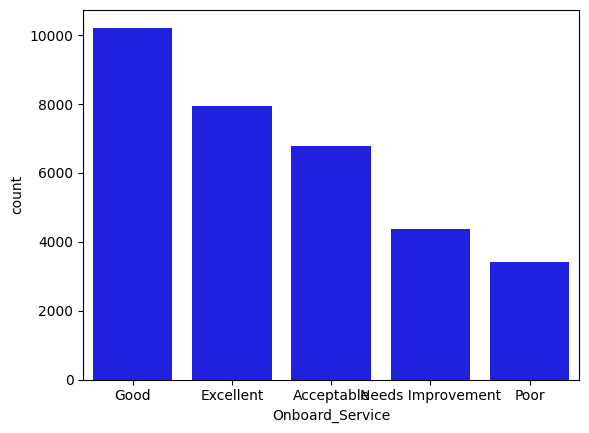

In [77]:
sns.countplot(x = 'Onboard_Service', data = df_test, color = 'blue', 
              order = df_test['Onboard_Service'].value_counts().index);

In [63]:
pd.set_option('display.max_columns', None)
df_test.head()

,Gender,Customer_Type,Age,Type_Travel,Travel_Class,Travel_Distance,Departure_Delay_in_Mins,Arrival_Delay_in_Mins,Seat_Comfort,Seat_Class,Arrival_Time_Convenient,Catering,Platform_Location,Onboard_Wifi_Service,Onboard_Entertainment,Online_Support,Ease_of_Online_Booking,Onboard_Service,Legroom,Baggage_Handling,CheckIn_Service,Cleanliness,Online_Boarding
0,Female,NaN,36.0,Business Travel,Business,532,0.0,0.0,Acceptable,Green Car,Acceptable,Acceptable,Manageable,Needs Improvement,Excellent,Good,Excellent,Excellent,Excellent,Excellent,Good,Excellent,Poor
1,Female,Disloyal Customer,21.0,Business Travel,Business,1425,9.0,28.0,Extremely Poor,Ordinary,Good,Poor,Manageable,Acceptable,Poor,Acceptable,Acceptable,Excellent,Acceptable,Good,Acceptable,Excellent,Acceptable
2,Male,Loyal Customer,60.0,Business Travel,Business,2832,0.0,0.0,Excellent,Ordinary,Excellent,Excellent,Very Convenient,Excellent,Excellent,Excellent,Needs Improvement,Needs Improvement,Needs Improvement,Needs Improvement,Good,Needs Improvement,Excellent
3,Female,Loyal Customer,29.0,Personal Travel,Eco,1352,0.0,0.0,Acceptable,Green Car,Excellent,Acceptable,Very Convenient,Poor,Acceptable,Excellent,Poor,Acceptable,Needs Improvement,Excellent,Excellent,Excellent,Poor
4,Male,Disloyal Customer,18.0,Business Travel,Business,1610,17.0,0.0,Excellent,Ordinary,Extremely Poor,Excellent,Needs Improvement,Excellent,Excellent,Excellent,Excellent,NaN,Acceptable,Excellent,Excellent,Excellent,Excellent


In [81]:
df_test.describe()

,Age,Travel_Distance,Departure_Delay_in_Mins,Arrival_Delay_in_Mins
count,35591.000000,35602.000000,35573.000000,35479.000000
mean,39.446995,1987.151761,14.880696,15.308802
std,15.137554,1024.308863,37.895453,38.531293
min,7.000000,50.000000,0.000000,0.000000
25%,27.000000,1360.000000,0.000000,0.000000
50%,40.000000,1929.000000,0.000000,0.000000
75%,51.000000,2559.000000,13.000000,13.000000
max,85.000000,6868.000000,978.000000,970.000000


(0.0, 100.0)

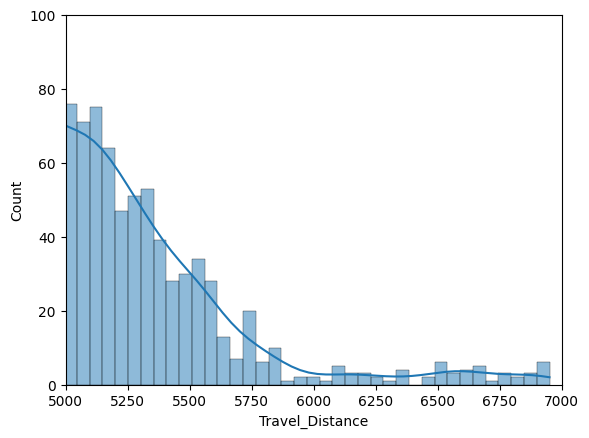

In [82]:
fig, ax = plt.subplots()
sns.histplot(x = 'Travel_Distance', data = df_train, kde = True, ax = ax);
ax.set_xlim(5000,7000)
ax.set_ylim(0,100)

## Export the data

In [67]:
train_final.to_csv("train_final.csv", index=False)
validation_final.to_csv("validation_final.csv", index=False)
test_final.to_csv("test_final.csv", index=False)